Importing modules

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

reading train data

In [4]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Data preprocessing

In [5]:
df['LoanAmount'].replace(np.nan,0,inplace=True)
df['Credit_History'].replace(np.nan,0,inplace=True)

In [6]:
x_train=df[['ApplicantIncome','CoapplicantIncome','Credit_History']]
x_train.shape

(614, 3)

In [7]:
y_train=df['LoanAmount']

In [8]:
y_train.shape

(614,)

In [9]:
x_train.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
dtype: int64

Reading test data

In [10]:
testdf=pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
testdf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [11]:
testdf.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
testdf['Loan_Amount_Term'].replace(np.nan,testdf['Loan_Amount_Term'].mean,inplace=True)

In [13]:
testdf['Credit_History'].replace(np.nan,0,inplace=True)

In [14]:
testdf.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [15]:
x_test=testdf[['ApplicantIncome','CoapplicantIncome','Credit_History']]
x_test

,ApplicantIncome,CoapplicantIncome,Credit_History
0,5720,0,1.0
1,3076,1500,1.0
2,5000,1800,1.0
3,2340,2546,0.0
4,3276,0,1.0
...,...,...,...
362,4009,1777,1.0
363,4158,709,1.0
364,3250,1993,0.0
365,5000,2393,1.0


In [16]:
x_test.isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
Credit_History       0
dtype: int64

In [17]:
y_test=testdf['LoanAmount']
y_test.isna().sum()

5

In [18]:
y_test.replace(np.nan,0,inplace=True)

In [19]:
y_test.isna().sum()

0

Building module

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg=LinearRegression()

In [22]:
model=reg.fit(x_train, y_train)

In [23]:
model.coef_

array([ 0.00821678,  0.00770908, -4.56984019])

In [24]:
model.intercept_

87.80403966566469

In [25]:
y_pred=model.predict(x_test)

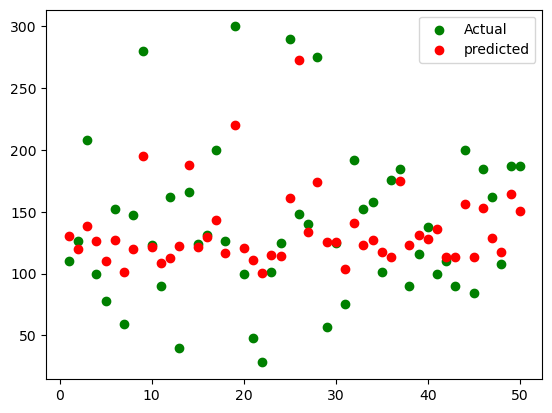

In [26]:
plt.scatter(range(1,51), y_test[0:50], c = "g", label = "Actual")
plt.scatter(range(1,51), y_pred[0:50], c = "r", label = "predicted")
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

36.98016324822748

In [38]:
mean_squared_error(y_test,y_pred)

3088.437323539057